In [2]:
import pandas as pd

In [104]:
data = pd.read_csv('data/scores.csv')
data

,Method,threshold,params,ROC AUC,PR AUC,F1 score,Accuracy,Precision,Recall,TP,TN,FP,FN,Training time,Inference time
0,DummyClassifier,NaN,"{'random_state': [0], 'strategy': ['stratified']}",0.489674,0.078787,0.068966,0.838000,0.063830,0.075000,18,2496,264,222,1.209470,0.003529
1,Basic LogisticRegression,NaN,"{'random_state': [0], 'max_iter': [3000]}",0.745713,0.208292,0.000000,0.918667,0.000000,0.000000,0,2756,4,240,40.024960,0.011581
2,Basic LogisticRegression [w/thresholding],0.241,"{'random_state': [0], 'max_iter': [3000]}",0.745713,0.208292,0.209974,0.899667,0.283688,0.166667,40,2659,101,200,40.024960,0.004038
3,Basic DecisionTreeClassifier,NaN,{'random_state': [0]},0.530616,0.087217,0.138196,0.850333,0.128114,0.150000,36,2515,245,204,2.478535,0.010528
4,Basic DecisionTreeClassifier [w/thresholding],0.999,{'random_state': [0]},0.530616,0.087217,0.138196,0.850333,0.128114,0.150000,36,2515,245,204,2.478535,0.007854
5,Basic RandomForestClassifier,NaN,{'random_state': [0]},0.698664,0.177358,0.000000,0.920000,0.000000,0.000000,0,2760,0,240,2.790521,0.100598
6,Basic RandomForestClassifier [w/thresholding],0.680,{'random_state': [0]},0.698664,0.177358,0.000000,0.920000,0.000000,0.000000,0,2760,0,240,2.790521,0.052659
7,Basic XGBClassifier,NaN,"{'seed': [0], 'objective': ['binary:logistic']...",0.735420,0.200251,0.045455,0.916000,0.250000,0.025000,6,2742,18,234,9.302778,0.040968
8,Basic XGBClassifier [w/thresholding],0.561,"{'seed': [0], 'objective': ['binary:logistic']...",0.735420,0.200251,0.030888,0.916333,0.210526,0.016667,4,2745,15,236,9.302778,0.020117
9,Basic KNeighborsClassifier,NaN,{},0.580269,0.101572,0.029740,0.913000,0.137931,0.016667,4,2735,25,236,0.127720,4.688209


## Les modèles sans aucun ajustement

In [118]:
basic = data[ ~(data.Method.str.contains('threshold')) & (data.Method.str.contains('Basic')) ][['Method','ROC AUC', 'F1 score','Recall']]
basic

,Method,ROC AUC,F1 score,Recall
1,Basic LogisticRegression,0.745713,0.000000,0.000000
3,Basic DecisionTreeClassifier,0.530616,0.138196,0.150000
5,Basic RandomForestClassifier,0.698664,0.000000,0.000000
7,Basic XGBClassifier,0.735420,0.045455,0.025000
9,Basic KNeighborsClassifier,0.580269,0.029740,0.016667


## Les modèles avec un `seuillage`

In [127]:
basic_t = data[ (data.Method.str.contains('threshold')) & (data.Method.str.contains('Basic')) ][['Method','ROC AUC', 'F1 score','Recall']]
basic_t

,Method,ROC AUC,F1 score,Recall
2,Basic LogisticRegression [w/thresholding],0.745713,0.209974,0.166667
4,Basic DecisionTreeClassifier [w/thresholding],0.530616,0.138196,0.150000
6,Basic RandomForestClassifier [w/thresholding],0.698664,0.000000,0.000000
8,Basic XGBClassifier [w/thresholding],0.735420,0.030888,0.016667
10,Basic KNeighborsClassifier [w/thresholding],0.580269,0.145199,0.129167


## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv` + `seuillage`

In [120]:
grid = data[ ~(data.Method.str.contains('threshold')) & (data.Method.str.contains('Grid')) ][['Method', 'ROC AUC', 'F1 score', 'Recall']]
grid_t = data[ (data.Method.str.contains('threshold')) & (data.Method.str.contains('Grid')) ][['Method', 'ROC AUC', 'F1 score', 'Recall']]
grid_t

,Method,ROC AUC,F1 score,Recall
12,Grid LogisticRegression [w/thresholding],0.746366,0.215223,0.170833
14,Grid DecisionTreeClassifier [w/thresholding],0.669684,0.166220,0.129167
16,Grid RandomForestClassifier [w/thresholding],0.722746,0.046693,0.025000
18,Grid XGBClassifier [w/thresholding],0.728588,0.060150,0.033333
20,Grid KNeighborsClassifier [w/thresholding],0.615902,0.184358,0.137500


## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv` + `seuillage` + `class_weight='balanced'` 

In [133]:
balanced = data[ ~(data.Method.str.contains('threshold')) & (data.Method.str.contains('Balanced')) & ~(data.Method.str.contains('features'))][['Method', 'ROC AUC', 'F1 score', 'Recall']]
balanced_t = data[ (data.Method.str.contains('threshold')) & (data.Method.str.contains('Balanced')) & ~(data.Method.str.contains('features'))][['Method', 'ROC AUC', 'F1 score', 'Recall']]
balanced_t

,Method,ROC AUC,F1 score,Recall
22,Balanced LogisticRegression [w/thresholding],0.745054,0.207098,0.887500
24,Balanced DecisionTreeClassifier [w/thresholding],0.678449,0.179399,0.870833
26,Balanced RandomForestClassifier [w/thresholding],0.695599,0.184807,0.866667
28,Balanced XGBClassifier [w/thresholding],0.730711,0.209922,0.837500


## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv` + `seuillage` + `class_weight='balanced'` + `extra features`

In [122]:
extra_features = data[ ~(data.Method.str.contains('threshold')) & (data.Method.str.contains('features')) ][['Method', 'ROC AUC', 'F1 score', 'Recall']]
extra_features_t = data[ (data.Method.str.contains('threshold')) & (data.Method.str.contains('features')) ][['Method', 'ROC AUC', 'F1 score', 'Recall']]
extra_features_t

,Method,ROC AUC,F1 score,Recall
30,Balanced LogisticRegression [w/thresholding & ...,0.744589,0.266227,0.504167
32,Balanced DecisionTreeClassifier [w/thresholdin...,0.676235,0.229866,0.570833
34,Balanced RandomForestClassifier [w/thresholdin...,0.695702,0.251232,0.425000
36,Balanced XGBClassifier [w/thresholding & featu...,0.727182,0.239389,0.587500


## Comparaison graphique des même modèles

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
def plot_scores( data_tmp, title="" ):

    fig = plt.figure(figsize=(20,5))
    data_tmp = data_tmp.copy()
    
    plt.suptitle(f"Comparaison des scores pour les {title}")
    
    #data_tmp['Method'] = data_tmp['Method'].apply(lambda x: str(x).rjust(100,'-').upper())
    
    labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNN']
    if( data_tmp.shape[0] == 4):
        labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

    ax1 = plt.subplot(1,3,1)
    sns.barplot(data=data_tmp, y='Method', x='ROC AUC')
    plt.xlim([0, 1])
    plt.title("ROC AUC")
    ax1.bar_label(ax1.containers[0])
    ax1.set_yticklabels(labels)

    ax2 = plt.subplot(1,3,2)
    sns.barplot(data=data_tmp, y='Method', x='F1 score')
    plt.xticks(rotation=90)
    plt.xlim([0, 1])
    plt.title("F1 score")
    ax2.axes.yaxis.set_visible(False)
    ax2.bar_label(ax2.containers[0])

    ax3 = plt.subplot(1,3,3)
    sns.barplot(data=data_tmp, y='Method', x='Recall')
    plt.xticks(rotation=90)
    plt.xlim([0, 1])
    plt.title("Recall")
    ax3.axes.yaxis.set_visible(False)
    ax3.bar_label(ax3.containers[0])

    fig.tight_layout()

    plt.show()

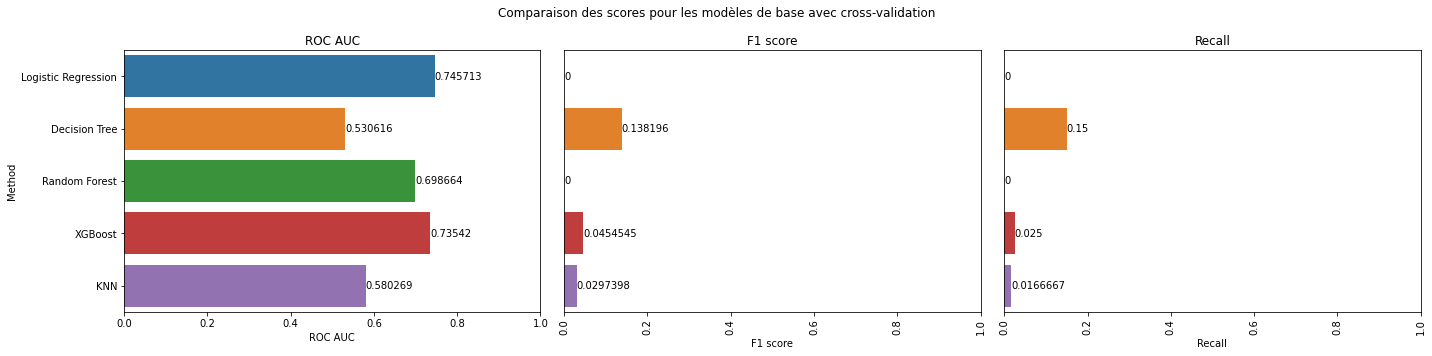

In [148]:
plot_scores( basic, "modèles de base avec cross-validation")

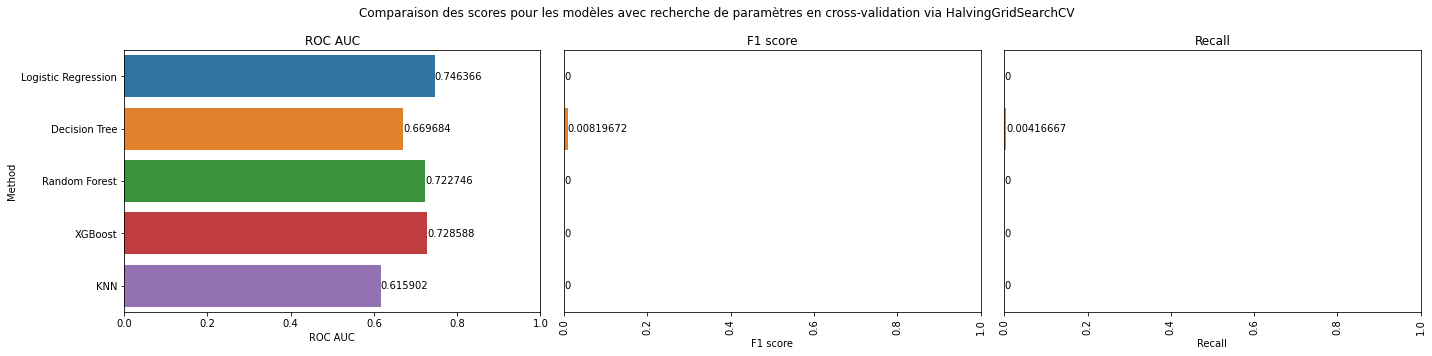

In [153]:
plot_scores( grid, "modèles avec recherche de paramètres en cross-validation via HalvingGridSearchCV" )

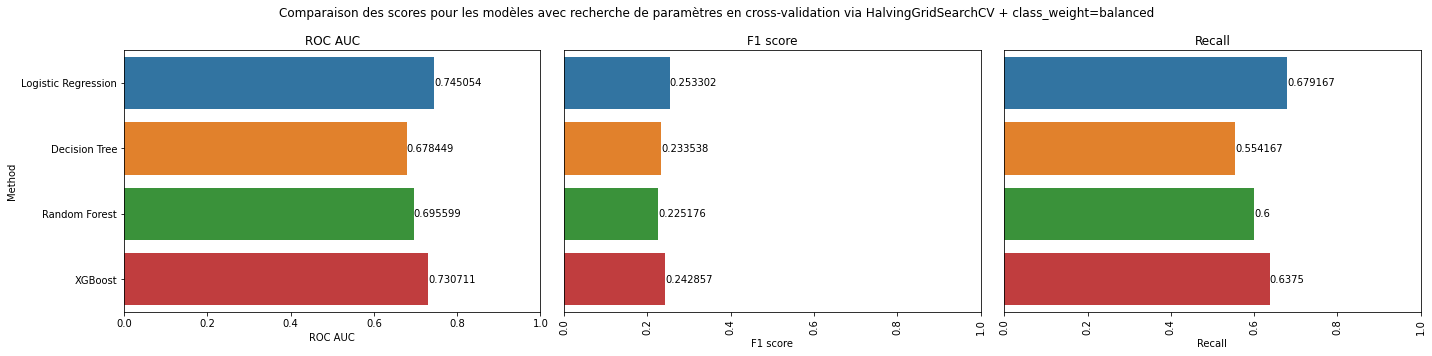

In [154]:
plot_scores( balanced, "modèles avec recherche de paramètres en cross-validation via HalvingGridSearchCV + class_weight=balanced" )

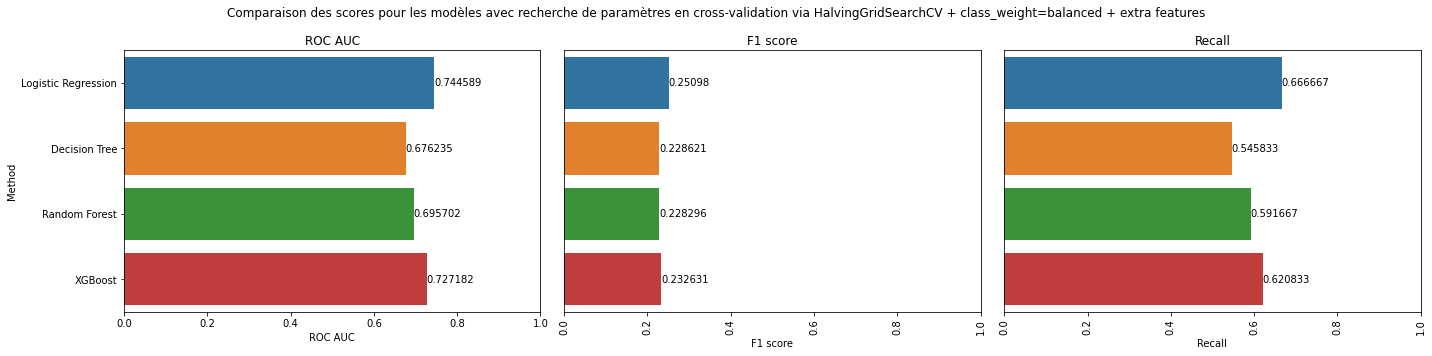

In [156]:
plot_scores( extra_features, "modèles avec recherche de paramètres en cross-validation via HalvingGridSearchCV + class_weight=balanced + extra features" )

# Les mêmes avec seuillage sur F1

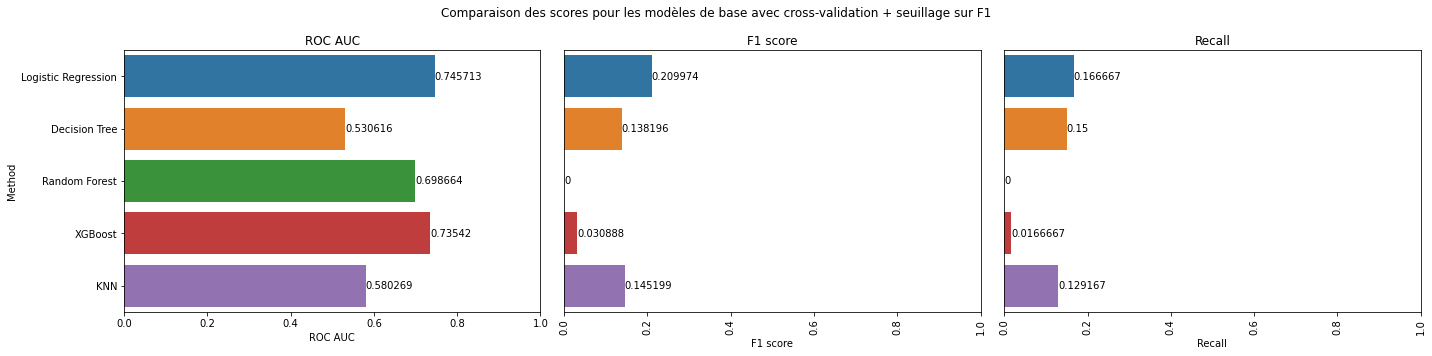

In [160]:
plot_scores( basic_t, "modèles de base avec cross-validation + seuillage sur F1")

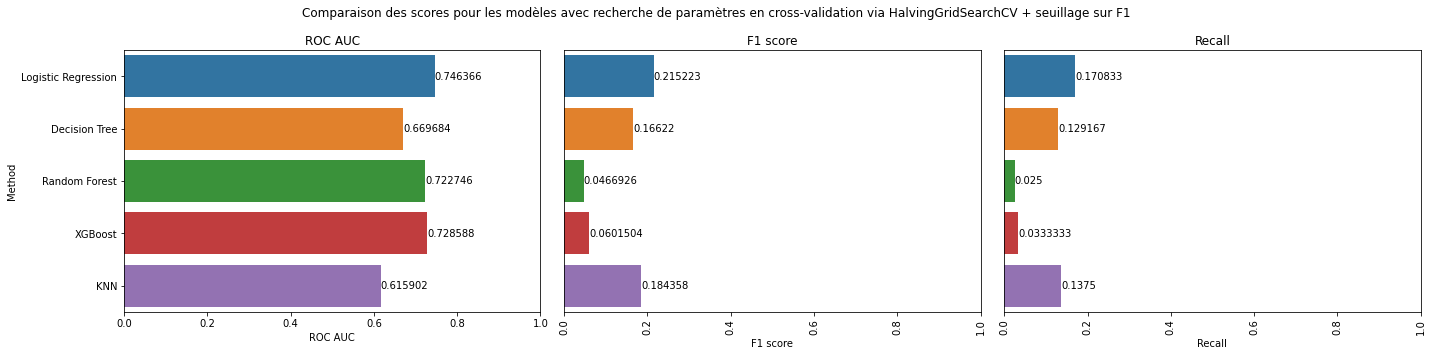

In [161]:
plot_scores( grid_t, "modèles avec recherche de paramètres en cross-validation via HalvingGridSearchCV + seuillage sur F1" )

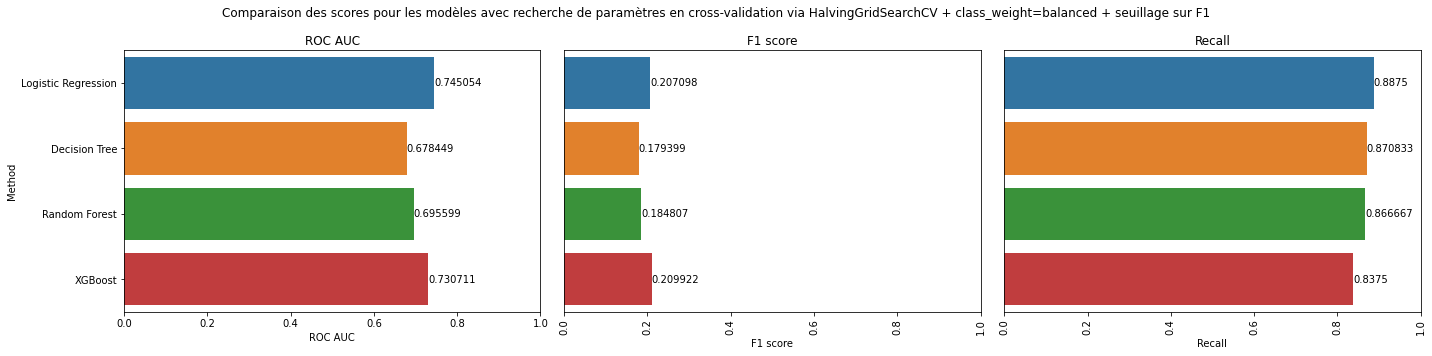

In [162]:
plot_scores( balanced_t, "modèles avec recherche de paramètres en cross-validation via HalvingGridSearchCV + class_weight=balanced + seuillage sur F1" )

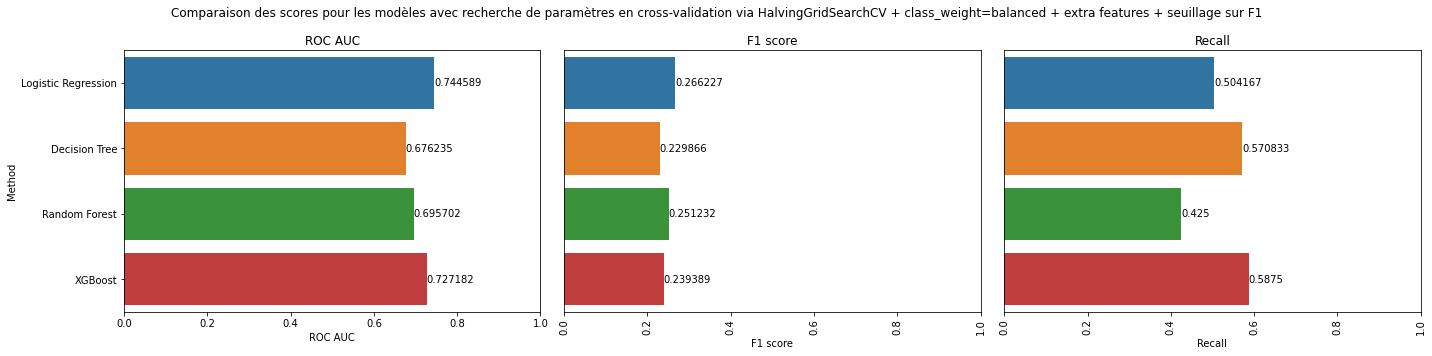

In [163]:
plot_scores( extra_features_t, "modèles avec recherche de paramètres en cross-validation via HalvingGridSearchCV + class_weight=balanced + extra features + seuillage sur F1" )